In [4]:
from IPython.display import Image
from IPython.core.display import HTML 

In [68]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

# Extracting Online Map Data using HERE API and Visualizing them through GeoPandas <br>
<b> By John Gabriel Daos

# ----------------------------------------------------------------------------------

## What is HERE WeGo?

In [10]:
Image(url= "https://cdn2.hubspot.net/hubfs/2174253/here-maps-ionic-framework.gif", width=700)

- HERE WeGo is an navigation service originally developed by Nokia
- Both Web and Mobile App use
- Navigation
- Traffic
- Location Sharing
- Offline Use

# ----------------------------------------------------------------------------------

# Here Developer API

In [13]:
Image(url= "https://cdn2.hubspot.net/hubfs/2174253/tracking_image_1.png", width=500)

### Features

- Map Rendering
- Geocoding
- Location Search
- Routing 
- Location Services
- ETC

#### Open Source Limits

- 250k transations per 
- $1 for additional 1000 transactions

# ----------------------------------------------------------------------------------

# HerePy

###  A pure Python interface for the HERE API.

https://github.com/abdullahselek/HerePy <br>
https://herepy.readthedocs.io/_/downloads/en/0.4.1/pdf/

Available clients are:

- Destination Weather API
- Geocoder API
- Geocoder Autocomplete API
- Reverse Geocoder API
- Places API
- Public Transit API
- Fleet Telematics Route Matching API
- Routing API
- EV Charging Stations API
- Fleet Telematics API
- Traffic API|

# GeoCoder

The process of converting an address to a specific coordinate

In [7]:
import herepy
import pandas as pd
from tqdm import tqdm 
import time

geocoderApi = herepy.GeocoderApi('ZJD1l_bw7yOZjJ9nDXoCNCVv5d-9nute2h9mcsgWsxE')
geocoderReverseApi = herepy.GeocoderReverseApi('ZJD1l_bw7yOZjJ9nDXoCNCVv5d-9nute2h9mcsgWsxE')

In [8]:
response = geocoderApi.free_form('Pacific Dr, Barangay 76, Pasay City, 1308')

In [28]:
response.as_dict()

{'items': [{'title': 'Pacific Dr, 1308 Pasay City, Philippines',
   'id': 'here:af:streetsection:jVDuclkJUGA-exrgpzUMND',
   'resultType': 'street',
   'address': {'label': 'Pacific Dr, 1308 Pasay City, Philippines',
    'countryCode': 'PHL',
    'countryName': 'Philippines',
    'stateCode': 'NCR',
    'state': 'National Capital Region',
    'county': 'Fourth District NCR',
    'city': 'Pasay City',
    'district': 'Barangay 76',
    'street': 'Pacific Dr',
    'postalCode': '1308'},
   'position': {'lat': 14.5357, 'lng': 120.98315},
   'mapView': {'west': 120.98303,
    'south': 14.5313,
    'east': 120.98325,
    'north': 14.5401},
   'scoring': {'queryScore': 1.0,
    'fieldScore': {'city': 1.0,
     'district': 1.0,
     'streets': [1.0],
     'postalCode': 1.0}}}]}

# Reverse GeoCoder

Process of converting a coordinate to an address

In [29]:
response = geocoderReverseApi.retrieve_addresses([14.53522, 120.98313])
response.as_dict()

{'items': [{'title': 'Pacific Dr, 1308 Pasay City, Philippines',
   'id': 'here:af:streetsection:jVDuclkJUGA-exrgpzUMND',
   'resultType': 'street',
   'address': {'label': 'Pacific Dr, 1308 Pasay City, Philippines',
    'countryCode': 'PHL',
    'countryName': 'Philippines',
    'stateCode': 'NCR',
    'state': 'National Capital Region',
    'county': 'Fourth District NCR',
    'city': 'Pasay City',
    'district': 'Barangay 76',
    'street': 'Pacific Dr',
    'postalCode': '1308'},
   'position': {'lat': 14.53522, 'lng': 120.98316},
   'distance': 3,
   'mapView': {'west': 120.98303,
    'south': 14.5313,
    'east': 120.98325,
    'north': 14.5401}}]}

# Places

In [30]:
PlacesApi = herepy.PlacesApi('ZJD1l_bw7yOZjJ9nDXoCNCVv5d-9nute2h9mcsgWsxE')

In [44]:
response = PlacesApi.onebox_search([14.53522, 120.98313], 'Jollibee')
pd.DataFrame.from_dict(response.as_dict()['items'])

,title,id,ontologyId,resultType,address,position,access,distance,categories,chains,references,foodTypes,contacts,openingHours
0,Jollibee,here:pds:place:608wdw49-ef144a4893c243cc972dd8...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Pacific Dr, 1308 Pasay Ci...","{'lat': 14.53543, 'lng': 120.98315}","[{'lat': 14.53543, 'lng': 120.98315}]",23,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '104869848...","[{'id': '101-000', 'name': 'American', 'primar...","[{'phone': [{'value': '+63285515414'}, {'value...","[{'text': ['Mon-Sun: 00:00 - 24:00'], 'isOpen'..."
1,Jollibee,here:pds:place:608wdw49-bd0f53a568ea41258390e3...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Harbor Dr, 1308 Pasay Cit...","{'lat': 14.53883, 'lng': 120.98204}","[{'lat': 14.53883, 'lng': 120.98205}]",418,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '119244027...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
2,Jollibee,here:pds:place:608wdw49-0161a92d8fda47bca9667c...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, 1308 Pasay City, Philippi...","{'lat': 14.53786, 'lng': 120.98786}","[{'lat': 14.53786, 'lng': 120.98786}]",588,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],NaN,"[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
3,Jollibee,here:pds:place:608d408k-72c46b15194f0fe5ffa431...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Pres. Diosdado P. Macapag...","{'lat': 14.5344, 'lng': 120.98904}","[{'lat': 14.5344, 'lng': 120.98906}]",643,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '119244809...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
4,Jollibee,here:pds:place:608wdw49-458f26bc8a85484eaa3aa3...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, 1308 Pasay City, Philippi...","{'lat': 14.53626, 'lng': 120.99021}","[{'lat': 14.53629, 'lng': 120.9902}]",771,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '120393671...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
5,Jollibee,here:pds:place:608wdw49-35ce864331fe47cb851140...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Bradco Ave, 1702 Parañaqu...","{'lat': 14.52933, 'lng': 120.99156}","[{'lat': 14.52936, 'lng': 120.99156}]",1119,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '119244727...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
6,Jollibee,here:pds:place:608wdw49-d6c8547038e34268bfe9e0...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, 1307 Pasay City, Philippi...","{'lat': 14.54591, 'lng': 120.9876}","[{'lat': 14.54591, 'lng': 120.9876}]",1282,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],NaN,"[{'id': '101-000', 'name': 'American', 'primar...","[{'phone': [{'value': '287000'}], 'www': [{'va...","[{'text': ['Mon-Sun: 00:00 - 12:00'], 'isOpen'..."
7,Jollibee,here:pds:place:608wdw49-96ec4bce0d174c339b344d...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Redemptorist Rd, 1702 Par...","{'lat': 14.53217, 'lng': 120.99499}","[{'lat': 14.53217, 'lng': 120.99499}]",1321,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '103896822...","[{'id': '101-000', 'name': 'American', 'primar...","[{'phone': [{'value': '+63286592510'}, {'value...","[{'text': ['Mon-Sun: 10:00 - 20:00'], 'isOpen'..."
8,Jollibee,here:pds:place:608wdw49-e6b01afa76cc40dcacef9d...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, F. B. Harrison, 1702 Para...","{'lat': 14.53227, 'lng': 120.99677}","[{'lat': 14.53226, 'lng': 120.99674}]",1504,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '103896841...","[{'id': '101-000', 'name': 'American', 'primar...","[{'phone': [{'value

In [67]:
response = PlacesApi.places_in_circle([14.53522, 120.98313],1000, 'Jollibee')
pd.DataFrame.from_dict(response.as_dict()['items'])

,title,id,ontologyId,resultType,address,position,access,distance,categories,chains,references,foodTypes,contacts,openingHours
0,Jollibee,here:pds:place:608wdw49-ef144a4893c243cc972dd8...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Pacific Dr, 1308 Pasay Ci...","{'lat': 14.53543, 'lng': 120.98315}","[{'lat': 14.53543, 'lng': 120.98315}]",23,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '104869848...","[{'id': '101-000', 'name': 'American', 'primar...","[{'phone': [{'value': '+63285515414'}, {'value...","[{'text': ['Mon-Sun: 00:00 - 24:00'], 'isOpen'..."
1,Jollibee,here:pds:place:608wdw49-bd0f53a568ea41258390e3...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Harbor Dr, 1308 Pasay Cit...","{'lat': 14.53883, 'lng': 120.98204}","[{'lat': 14.53883, 'lng': 120.98205}]",418,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '119244027...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
2,Jollibee,here:pds:place:608wdw49-0161a92d8fda47bca9667c...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, 1308 Pasay City, Philippi...","{'lat': 14.53786, 'lng': 120.98786}","[{'lat': 14.53786, 'lng': 120.98786}]",588,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],NaN,"[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
3,Jollibee,here:pds:place:608d408k-72c46b15194f0fe5ffa431...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, Pres. Diosdado P. Macapag...","{'lat': 14.5344, 'lng': 120.98904}","[{'lat': 14.5344, 'lng': 120.98906}]",643,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '119244809...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN
4,Jollibee,here:pds:place:608wdw49-458f26bc8a85484eaa3aa3...,here:cm:ontology:jollibee,place,"{'label': 'Jollibee, 1308 Pasay City, Philippi...","{'lat': 14.53626, 'lng': 120.99021}","[{'lat': 14.53629, 'lng': 120.9902}]",771,"[{'id': '100-1000-0009', 'name': 'Fast Food', ...",[{'id': '7403'}],"[{'supplier': {'id': 'core'}, 'id': '120393671...","[{'id': '101-000', 'name': 'American', 'primar...",NaN,NaN


# SAMPLE USE CASE

### Getting All Gas Stations in the Philippines (That are only available on HERE)

<b> Coordinates of cities in the Philippines Scraped from Wikipedia

In [50]:
city_coordinates = pd.read_csv('ph_city_coordinates.csv')

In [61]:
city_coordinates['city'] = [city.replace('(','').replace(')','') for city in city_coordinates['city']]
city_coordinates.head()

,city,coordinates,latitude,longitude
0,Alaminos,16°09′23″N 119°58′49″E,16.15639,119.98028
1,Angeles,15°08′24″N 120°35′16″E,15.14000,120.58778
2,Antipolo,14°35′13″N 121°10′33″E,14.58694,121.17583
3,Bacolod,10°40′34″N 122°57′05″E,10.67611,122.95139
4,Bacoor,14°27′34″N 120°56′24″E,14.45944,120.94000


In [80]:
df = pd.DataFrame()
with tqdm(total=city_coordinates.shape[0]) as pbar:
    for index, row in city_coordinates.iterrows():
        pbar.update(1)
        response = PlacesApi.onebox_search([row['latitude'], row['longitude']], 'Petrol Station')
        df = df.append(pd.DataFrame.from_dict(response.as_dict()['items']))
        time.sleep(2)

100%|██████████| 146/146 [05:46<00:00,  2.37s/it]


In [95]:
df = df.reset_index(drop = True)

In [110]:
df['lat'] = [pos['lat'] for pos in df['position']]
df['lng'] = [pos['lng'] for pos in df['position']]

AttributeError: 'float' object has no attribute 'astype'

In [108]:
df.to_csv('scraped_gstations.csv')

In [109]:
df.head()

,title,id,ontologyId,resultType,address,position,access,distance,categories,chains,references,contacts,openingHours,foodTypes,lat,lng
0,Gemini Auto Supply & Motorcycle Parts,here:pds:place:608wdv7f-54a6ffb2847541c68924d2...,here:cm:ontology:petrol_gasoline_station,place,{'label': 'Gemini Auto Supply & Motorcycle Par...,"{'lat': 16.15403, 'lng': 119.98168}","[{'lat': 16.15407, 'lng': 119.9817}]",302,"[{'id': '700-7600-0116', 'name': 'Gas Station'...",NaN,NaN,NaN,NaN,NaN,16.15403,119.98168
1,Petron,here:pds:place:608jx7ps-1392146e13260203a90a88...,here:cm:ontology:petrol_gasoline_station,place,"{'label': 'Petron, Pangasinan-Zambales Rd, 240...","{'lat': 16.15349, 'lng': 119.9826}","[{'lat': 16.15349, 'lng': 119.9826}]",407,"[{'id': '700-7600-0116', 'name': 'Gas Station'...",[{'id': '7065'}],"[{'supplier': {'id': 'core'}, 'id': '108386319...","[{'phone': [{'value': '+637585527072'}], 'www'...",NaN,NaN,16.15349,119.98260
2,Rystar,here:pds:place:608wdv7f-61b8f02dcb5d4a49ace585...,here:cm:ontology:petrol_gasoline_station,place,"{'label': 'Rystar, San Jose Dr, 2404 Alaminos,...","{'lat': 16.16312, 'lng': 119.98344}","[{'lat': 16.16311, 'lng': 119.98346}]",821,"[{'id': '700-7600-0116', 'name': 'Gas Station'...",NaN,"[{'supplier': {'id': 'core'}, 'id': '120418082...",NaN,NaN,NaN,16.16312,119.98344
3,Caltex,here:pds:place:608wdv7f-cc48fcd8d9cf4e35a87905...,here:cm:ontology:petrol_gasoline_station,place,"{'label': 'Caltex, Pangasinan-Zambales Rd, 240...","{'lat': 16.15028, 'lng': 119.98589}","[{'lat': 16.1503, 'lng': 119.98592}]",906,"[{'id': '700-7600-0116', 'name': 'Gas Station'...",[{'id': '878'}],"[{'supplier': {'id': 'core'}, 'id': '119418359...",[{'www': [{'value': 'https://www.caltex.com/ph...,NaN,NaN,16.15028,119.98589
4,TOTAL,here:pds:place:608wdv7f-8254a33a8b734552948135...,here:cm:ontology:petrol_gasoline_station,place,"{'label': 'TOTAL, Pangasinan-Zambales Rd, 2404...","{'lat': 16.15019, 'lng': 119.98591}","[{'lat': 16.15023, 'lng': 119.98597}]",915,"[{'id': '700-7600-0116', 'name': 'Gas Station'...",[{'id': '35'}],"[{'supplier': {'id': 'core'}, 'id': '120418076...",NaN,NaN,NaN,16.15019,119.98591


## GEOPANDAS

GeoPandas is an open source project to make working with geospatial data in python easier.

In [115]:
import geopandas as gpd

#### Converting our scraped data to geopandas format

In [154]:
df = pd.read_csv('scraped_gstations.csv')

In [155]:
# Converting the 
df['lat'] = df['lat'].astype(float)
df['lng'] = df['lng'].astype(float)

In [156]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lng, df.lat))

<AxesSubplot:>

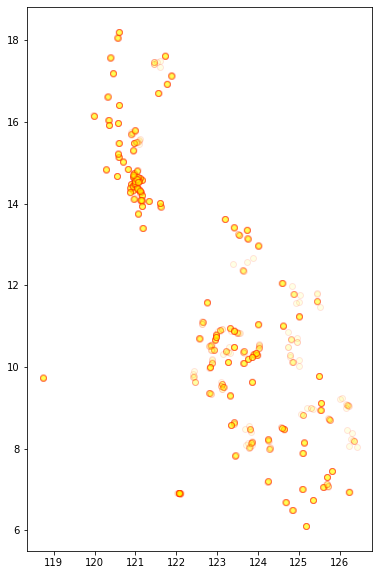

In [157]:
gdf.plot(figsize=(10, 10), alpha=0.1, color =  'yellow', edgecolor='red')

#### Reading a shp file to map out the Philippines

In [158]:
ph = gpd.read_file('ph_shp/MuniCities.shp')
ph.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,20,Sallapadan,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81813 17.45325, 120.80331 17.449..."
1,177,PHL,Philippines,1,Abra,21,San Isidro,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.62464 17.44141, 120.62530 17.441..."
2,177,PHL,Philippines,1,Abra,22,San Juan,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.81137 17.74075, 120.78275 17.714..."
3,177,PHL,Philippines,1,Abra,23,San Quintin,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.53461 17.53930, 120.53348 17.538..."
4,177,PHL,Philippines,1,Abra,24,Tayum,None,None,Bayan|Munisipyo,Municipality,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.69169 17.63382, 120.69412 17.632..."


<AxesSubplot:>

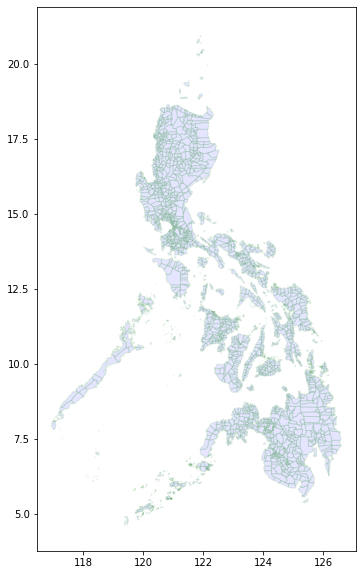

In [159]:
ph.plot(figsize=(10, 10), alpha=0.1, color =  'blue', edgecolor='green')

<AxesSubplot:>

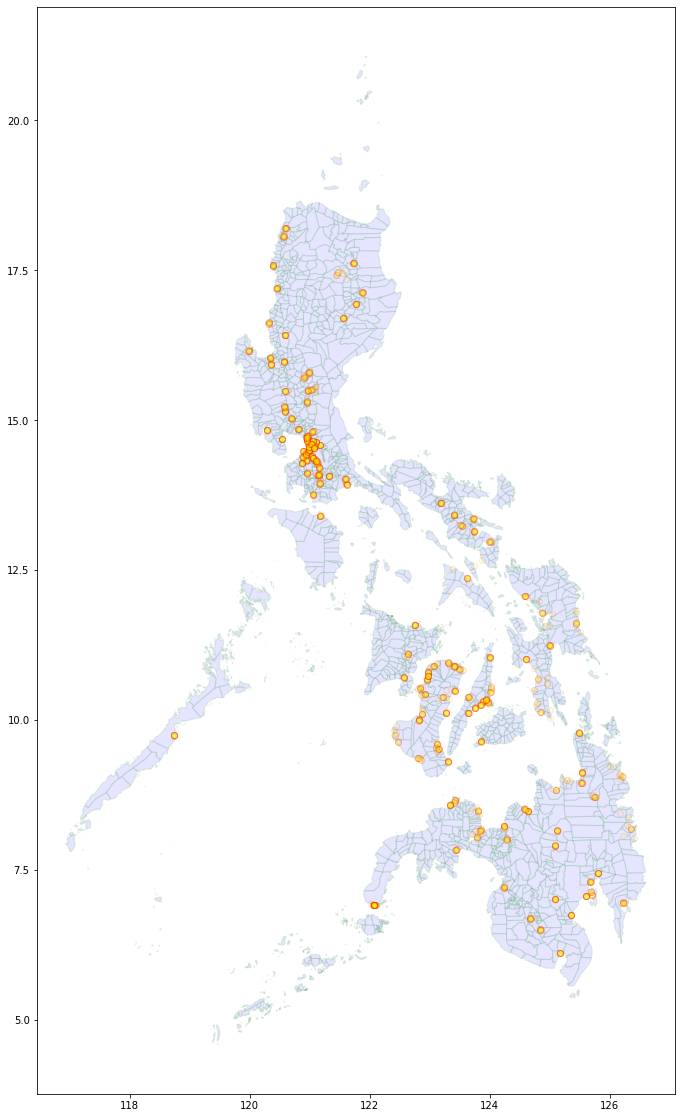

In [160]:
ax = ph.plot(figsize=(20, 20), alpha=0.1, color =  'blue', edgecolor='green')
gdf.plot(ax = ax, alpha=0.1, color =  'yellow', edgecolor='red')

## Adding More Context 

In [161]:
import contextily as ctx

In [162]:
# Convert coordinate reference system

gdf.crs = {'init' :'epsg:4326'}
gdf = gdf.to_crs(epsg=3857)

ph = ph.to_crs(epsg=3857)

C:\Anaconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


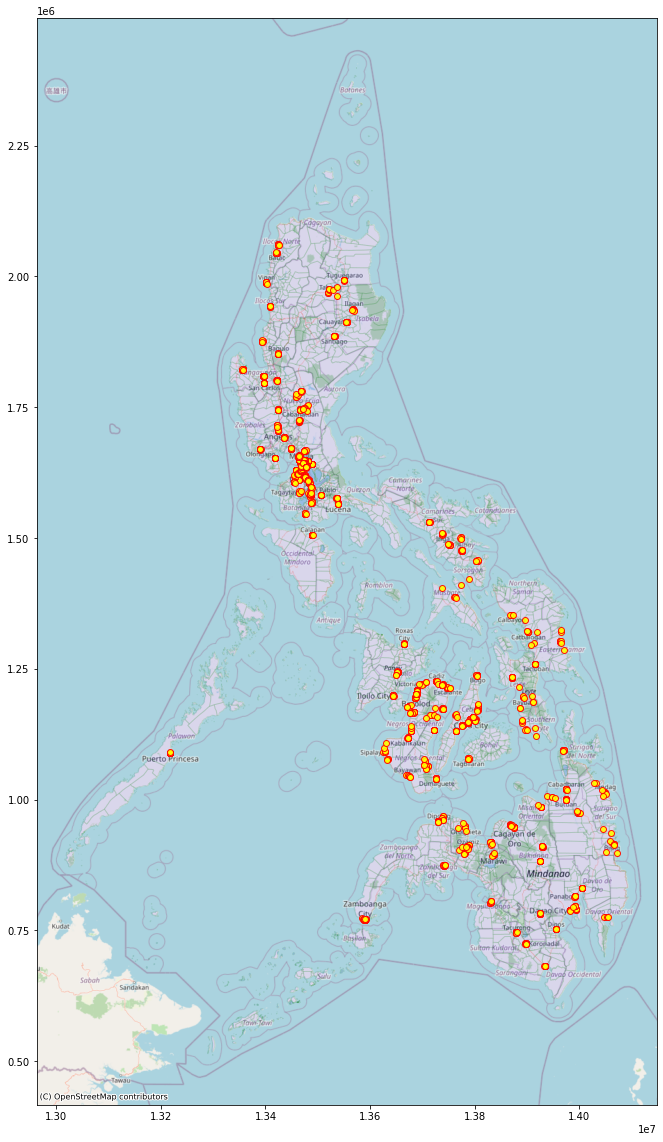

In [165]:
ax = ph.plot(figsize=(20, 20), alpha=0.1, color =  'blue', edgecolor='green')
ax = gdf.plot(ax = ax, alpha=0.9, color =  'yellow', edgecolor='red')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

#### Map Types

In [167]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [168]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])